In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import csv
import tensorflow as tf
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
def rmse(a, b):
    sum = 0
    for i in range(len(a)):
        sum = sum + (a[i] - b[i]) ** 2
    return np.sqrt(sum / len(a))

In [ ]:
pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826229 sha256=b96003f40e99e81c26cf3a699106c6ed2475dd016b4b6c6f8e9edf852ae4f625
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan


In [ ]:
pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436020 sha256=72341834d1e3ca2e211438370f711b09a22cff28f8ea456345f0971219e62eac
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fbprophet import Prophet

In [ ]:
def Bayseian(txs, forecastDay, amountOfRain, maxOfTemp, minOfTemp, forcastedRain, forcastedMax, forcastedMin, allsunday, unit):
    global mockForecastDictionary
    global realForecastDictionary

    newyear = pd.DataFrame({
        'holiday': 'newyear',
        'ds': pd.to_datetime(['2016-02-08', '2017-01-28',
                              '2018-02-16', '2019-02-05', '2020-01-25',
                              '2021-02-12', '2022-02-01']),
        'lower_window': -1,
        'upper_window': 1,
    })

    newyearbefore = pd.DataFrame({
        'holiday': 'newyearbefore',
        'ds': pd.to_datetime(['2016-02-01', '2017-01-16',
                              '2018-02-05', '2019-01-28', '2020-01-13',
                              '2021-02-01', '2022-01-24']),
        'lower_window': -4,
        'upper_window': 4,
    })

    thanksgiving = pd.DataFrame({
        'holiday': 'thanksgiving',
        'ds': pd.to_datetime(['2016-09-15', '2017-10-04', '2018-09-24',
                              '2019-09-13', '2020-10-01', '2021-09-21',
                              '2022-09-10']),
        'lower_window': -1,
        'upper_window': 1,
    })

    thanksgivingbefore = pd.DataFrame({
        'holiday': 'thanksgivingbefore',
        'ds': pd.to_datetime(['2016-09-05', '2017-09-25', '2018-09-17',
                              '2019-09-02', '2020-09-21', '2021-09-13',
                              '2022-08-29']),
        'lower_window': -1,
        'upper_window': 1,
    })

    chocostick = pd.DataFrame({
        'holiday': 'chocostick',
        'ds': pd.to_datetime(['2016-11-11', '2017-11-11', '2018-11-11',
                              '2019-11-11', '2020-11-11', '2021-11-11',
                              '2022-11-11']),
        'lower_window': 0,
        'upper_window': 0,
    })

    sunday = pd.DataFrame({
        'holiday': 'sunday',
        'ds': pd.to_datetime(allsunday),
        'lower_window': 0,
        'upper_window': 0,
    })


    if unit is 'day':
        # print("here2")
        if (len(txs) < 366):
            model = Prophet()
            model.fit(txs)
            future = model.make_future_dataframe(periods=forecastDay)
            forecastProphetTable = model.predict(future)

        else:
            holidaybeta = pd.concat((newyear, thanksgiving, chocostick, sunday))

            model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, holidays=holidaybeta, holidays_prior_scale=40)
            model.add_seasonality(name='week', period=7, fourier_order=7, prior_scale=20)
            if(amountOfRain.any()) :
                print('here')
                txs['rain_amount'] = amountOfRain
                model.add_regressor('rain_amount')
                txs['max_temp'] = maxOfTemp
                model.add_regressor('max_temp')
                txs['min_temp'] = minOfTemp
                model.add_regressor('min_temp')
            else :
                print('none')

            model.fit(txs)
            future = model.make_future_dataframe(periods=forecastDay, freq= 'd')

            # print(future)
            # future['weather'] = weather
            if(forcastedRain.any()) :
                future['rain_amount'] = forcastedRain
                future['max_temp'] = forcastedMax
                future['min_temp'] = forcastedMin
            else :
                print('none')

            forecastProphetTable = model.predict(future)
            print(forecastProphetTable)

            usecaseofholiday = forecastProphetTable[(forecastProphetTable['newyear'] + forecastProphetTable['thanksgiving'] + forecastProphetTable['chocostick'] + forecastProphetTable['sunday']).abs() > 0][['ds', 'newyear', 'thanksgiving', 'chocostick', 'sunday']][:]
            print(usecaseofholiday)

    elif unit is 'week':
        # print("here2")
        if (len(txs) < 53):
            model = Prophet()
            model.fit(txs)
            future = model.make_future_dataframe(periods=forecastDay, freq='w')
            forecastProphetTable = model.predict(future)

        else:
            model = Prophet(yearly_seasonality=True)
            model.fit(txs)
            future = model.make_future_dataframe(periods=forecastDay, freq='w')
            forecastProphetTable = model.predict(future)

    elif unit is 'month':
        # print("here2")
        if (len(txs) < 12):
            model = Prophet()
            model.fit(txs)
            future = model.make_future_dataframe(periods=forecastDay, freq='m')
            forecastProphetTable = model.predict(future)

        else:
            # print("here")
            holidaybeta = pd.concat((newyear, thanksgiving, chocostick))
            model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, holidays=holidaybeta)
            # weatherL = weather[:-forecastDay]
            # txs['weather'] = weatherL
            # model.add_regressor('weather')
            model.fit(txs)
            future = model.make_future_dataframe(periods=forecastDay, freq='m')
            # future['weather'] = weather
            forecastProphetTable = model.predict(future)
            # usecaseofholiday = forecastProphetTable[(forecastProphetTable['newyear'] + forecastProphetTable['thanksgiving'] + forecastProphetTable['chocostick']).abs() > 0][
            # ['ds', 'newyear', 'thanksgiving', 'chocostick']][:]
            # print(usecaseofholiday)

    # date = [d.strftime('%Y-%m-%d') for d in forecastProphetTable['ds']]
    return [np.exp(y) for y in forecastProphetTable['yhat'][-forecastDay:]]

In [ ]:
# 원본 데이터 확인 및 정의

dataByDates = pd.read_csv('KPPinput16_22_0.csv', header = 0)
dataDates = pd.to_datetime(dataByDates['ds'])
dataValues = dataByDates['y']
dataRainAmount = dataByDates['rain_amount']
dataTempMax = dataByDates['temp_max']
dataTempMin = dataByDates['temp_min']

In [ ]:
# 데이터 확인
dataByDates.head(10)

,n,ds,rain_amount,temp_max,temp_min,y
0,0,2016-01-01,0.0,4.0,-3.3,1863
1,1,2016-01-02,0.0,9.5,1.0,982
2,2,2016-01-03,0.0,9.4,5.1,6
3,3,2016-01-04,0.0,5.3,-2.5,2464
4,4,2016-01-05,0.0,1.5,-4.8,3053
5,5,2016-01-06,0.0,1.7,-4.9,2959
6,6,2016-01-07,0.0,1.4,-5.9,2606
7,7,2016-01-08,0.0,1.0,-6.9,2411
8,8,2016-01-09,0.0,2.4,-6.2,1743
9,9,2016-01-10,0.0,3.8,-2.7,44


In [ ]:
dataByDates.tail(10)

,n,ds,rain_amount,temp_max,temp_min,y
2547,355,2022-12-22,0.0,-2.6,-11.3,2255
2548,356,2022-12-23,0.0,-8.6,-13.7,2360
2549,357,2022-12-24,0.0,-2.0,-13.5,1133
2550,358,2022-12-25,0.0,0.2,-9.6,90
2551,359,2022-12-26,0.0,1.7,-7.9,2245
2552,360,2022-12-27,0.0,3.3,-7.3,2591
2553,361,2022-12-28,0.1,0.1,-6.0,2664
2554,362,2022-12-29,0.0,2.1,-7.8,2128
2555,363,2022-12-30,0.0,2.3,-4.4,2079
2556,364,2022-12-31,0.0,2.1,-5.1,1014


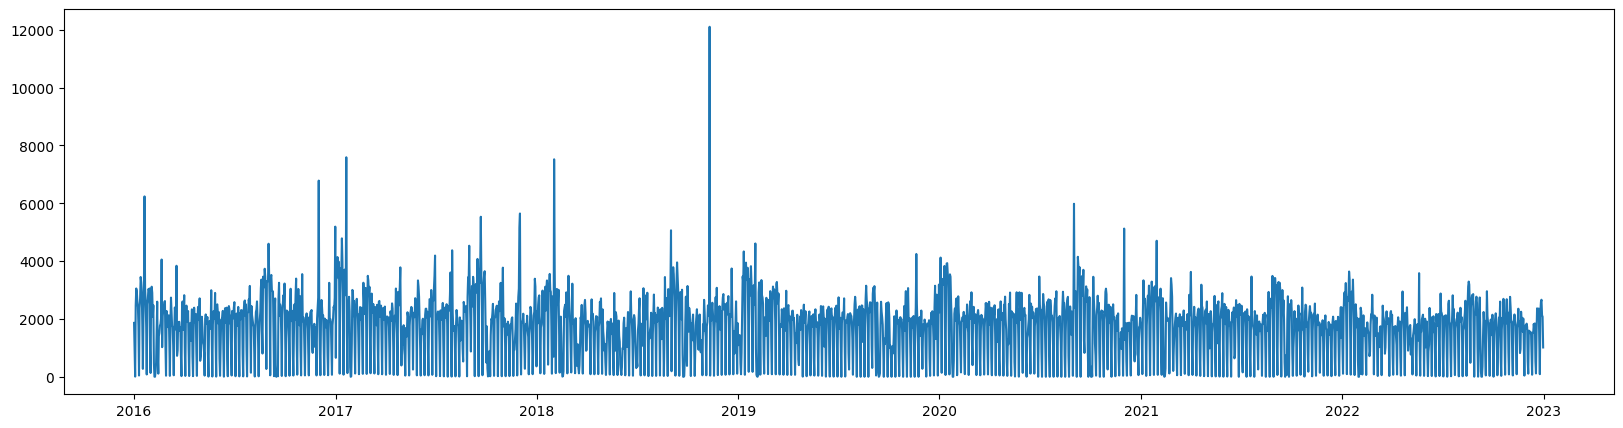

In [ ]:
# 데이터 시각화
plt.figure(figsize=(20, 5))
plt.plot(dataDates, dataValues)
plt.show()

In [ ]:
# 일요일 정의
def day_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6:
        return 1
    else:
        return 0
dataByDates['sunday'] = dataByDates['ds'].apply(day_sunday)
dataHolidaySunday = []
for i in range(0, len(dataByDates['ds'])) :
    if dataByDates['sunday'][i] == 1:
        dataHolidaySunday.append(pd.to_datetime(dataByDates['ds'][i]))

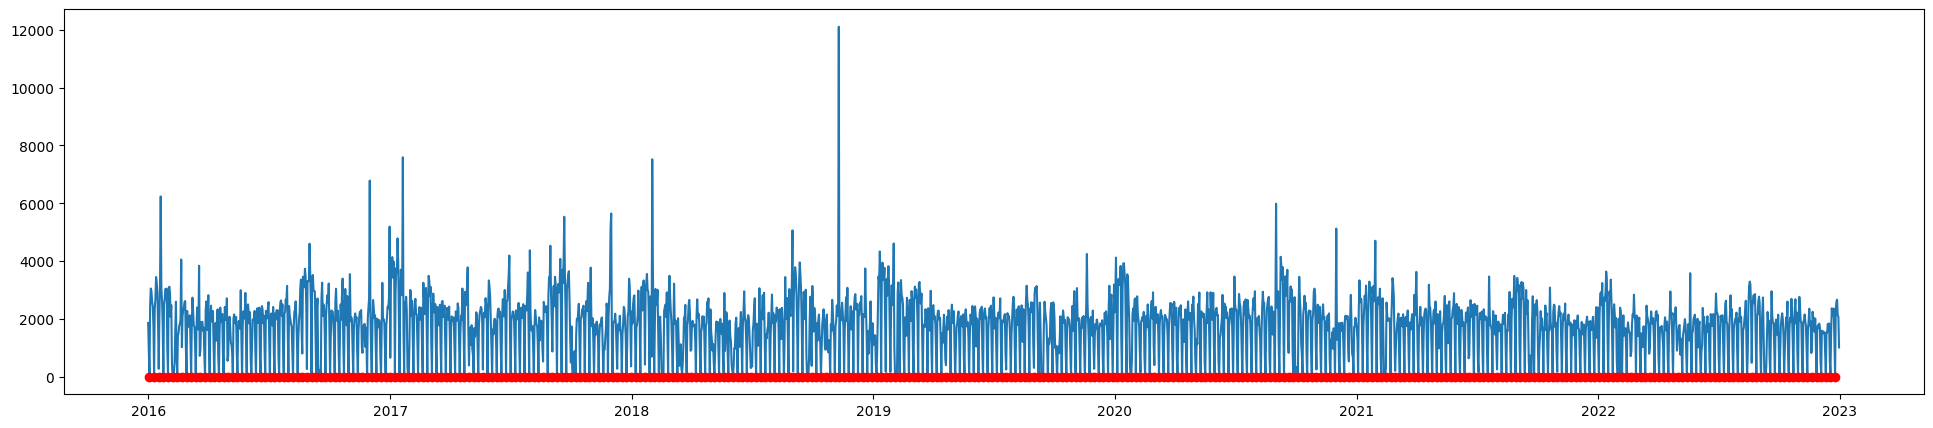

In [ ]:
# 일요일 시각화
plt.figure(figsize=(24, 5))
plt.plot(dataDates, dataValues)
plt.plot(dataHolidaySunday, [0 for i in range(0, len(dataHolidaySunday))], 'ro')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


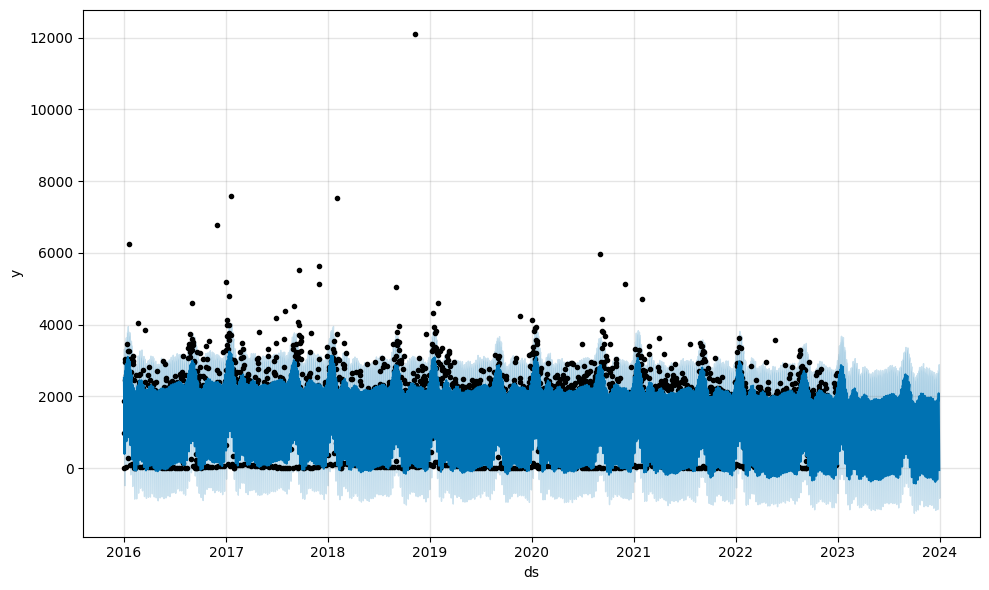

In [ ]:
#추세선, 계절성, 휴일, 주말 시각화
m = Prophet()
m.fit(dataByDates)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

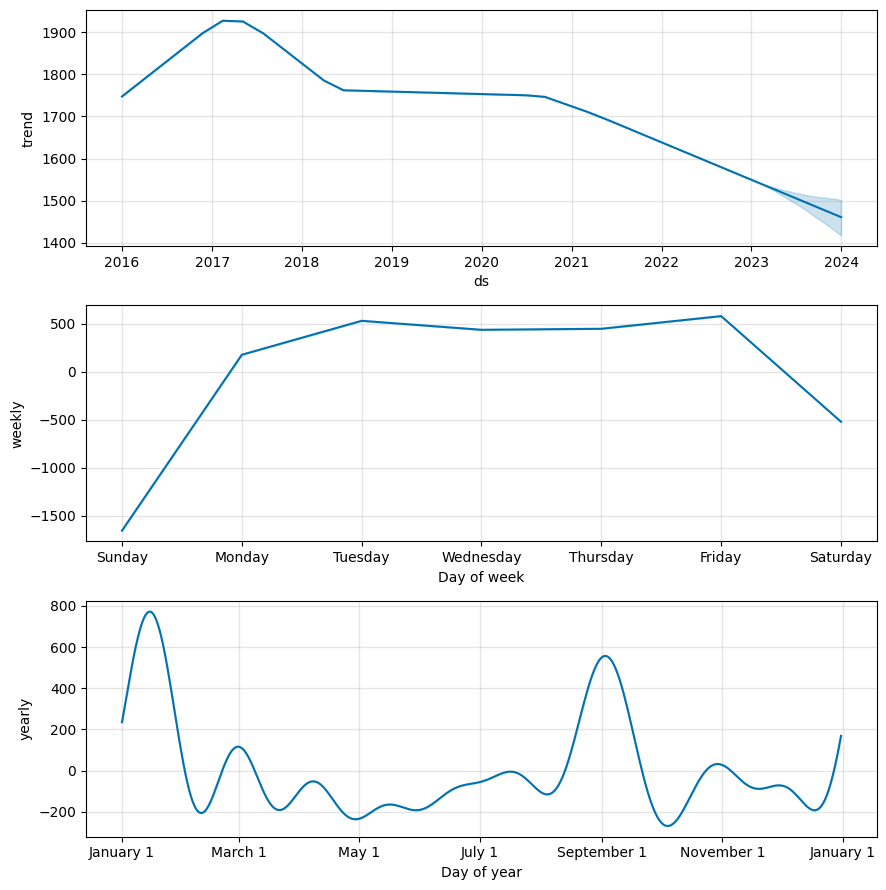

In [ ]:
#트렌드, 주간, 연간 시각화
fig2 = m.plot_components(forecast)

In [ ]:
rawArrayDatas = pd.concat((dataDates, dataValues), axis=1)

In [ ]:
numberOf2022 = 334
forecastDay = 365

In [ ]:
# bayseian에 대해서는 input값이 0인 상황처리 필요
ds = rawArrayDatas['ds'][:-numberOf2022]
y = list(np.log(rawArrayDatas['y'][:-numberOf2022]))
rainAmount = dataRainAmount[:-numberOf2022]
tempMax = dataTempMax[:-numberOf2022]
tempMin = dataTempMin[:-numberOf2022]

In [ ]:
import math

In [ ]:
# 2022예측하고 rmse 구하기
salesFor2022 = list(zip(ds, y))
txsFor2022 = pd.DataFrame(data=salesFor2022, columns=['ds', 'y'])

# 무한대와 NaN 값 처리
txsFor2022.replace([np.inf, -np.inf], np.nan, inplace=True)
txsFor2022.dropna(inplace=True)

testFor2022 = {}
testFor2022['Bayseian'] = Bayseian(txsFor2022, numberOf2022, rainAmount, tempMax, tempMin, dataRainAmount, dataTempMax, dataTempMin, dataHolidaySunday,'day')
YFor2022 = {}
YFor2022['Bayseian'] = list(rawArrayDatas['y'][-numberOf2022:])

# 무한대와 NaN 값 처리
YFor2022['Bayseian'] = [x if not math.isinf(x) else 0 for x in YFor2022['Bayseian']]
YFor2022['Bayseian'] = [x if not math.isnan(x) else 0 for x in YFor2022['Bayseian']]
testFor2022['Bayseian'] = [x if not math.isinf(x) else 0 for x in testFor2022['Bayseian']]
testFor2022['Bayseian'] = [x if not math.isnan(x) else 0 for x in testFor2022['Bayseian']]

resultofrmse = rmse(YFor2022['Bayseian'], testFor2022['Bayseian'])
print(resultofrmse)

here
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2016-01-01  7.284158    7.177575    8.392076     7.284158     7.284158   
1    2016-01-02  7.284547    6.449881    7.778790     7.284547     7.284547   
2    2016-01-03  7.284937    3.455951    4.697897     7.284937     7.284937   
3    2016-01-04  7.285326    6.983174    8.311049     7.285326     7.285326   
4    2016-01-05  7.285716    7.190549    8.489789     7.285716     7.285716   
...         ...       ...         ...         ...          ...          ...   
2504 2022-12-25  7.263575    3.236629    4.486480     7.249684     7.274927   
2505 2022-12-26  7.263505    6.768193    8.115821     7.249522     7.274929   
2506 2022-12-27  7.263435    6.985690    8.278755     7.249360     7.274924   
2507 2022-12-28  7.263365    6.852554    8.100468     7.249202     7.274911   
2508 2022-12-29  7.263295    7.031741    8.274524     7.249058     7.274881   

      additive_terms  additive_terms_lower  ad

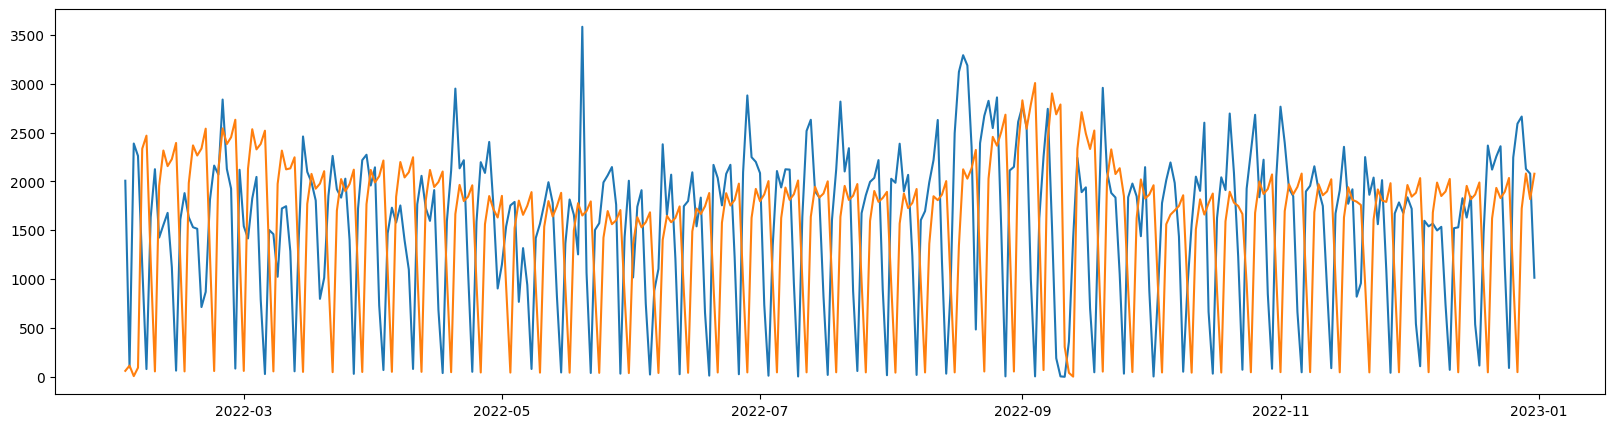

In [ ]:
# 2022년 y값 시각화
plt.figure(figsize=(20, 5))
plt.plot(dataDates[-numberOf2022:], YFor2022['Bayseian'])
plt.plot(dataDates[-numberOf2022:], testFor2022['Bayseian'])
plt.show()

In [ ]:
# 모델 저장하기
import pickle
with open('prophet_model01.pkl', 'wb') as f:
    pickle.dump(Bayseian, f)